In [2]:
#!pip install gradio

In [1]:
import gradio as gr

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


import imgaug as ia
ia.seed(1)
# imgaug uses matplotlib backend for displaying images
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import imutils
import pandas as pd
import numpy as np
import requests
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil
from PIL import Image
from PIL import Image, ImageEnhance

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
 
img_width, img_height = 256, 256

plt.rcParams['figure.figsize'] = [15,8]

import warnings
warnings.filterwarnings("ignore")

import cv2
import numpy as np
import os

import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import glob

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import Adam

In [2]:
# Creating a New Directory for Accept Images

CROPPED_PATH = os.path.join('reinforced_images4','Accept_Images')
# C:\Users\nabhishe\MITC Project

if not os.path.exists(CROPPED_PATH):
    !mkdir {CROPPED_PATH}
    
# Creating a New Directory for Accept Images

CROPPED_PATH = os.path.join('reinforced_images4','Reject_Images')
# C:\Users\nabhishe\MITC Project

if not os.path.exists(CROPPED_PATH):
    !mkdir {CROPPED_PATH}

In [3]:
# Creating a New Directory for output folder

CROPPED_PATH = os.path.join('output_split_folder')
# C:\Users\nabhishe\MITC Project

if not os.path.exists(CROPPED_PATH):
    !mkdir {CROPPED_PATH}

Found 416 files belonging to 2 classes.


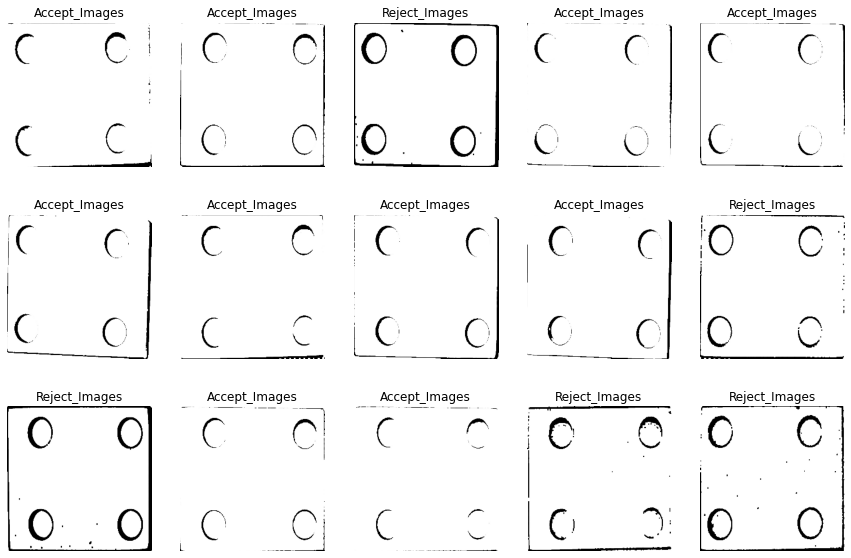

In [4]:
train_dataset = image_dataset_from_directory('C:\\Users\\nabhishe\\MITC_Project\\output_split_folder\\train',
                                             shuffle=True,
                                             batch_size=32,image_size=(256,256))
class_name =  train_dataset.class_names
plt.figure(figsize = (15,10))
for image , label in train_dataset.take(1):
    for i in range(15) :
        plt.subplot(3,5,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [5]:
train_path = 'C:\\Users\\nabhishe\\MITC_Project\\output_split_folder\\train'
valid_path = 'C:\\Users\\nabhishe\\MITC_Project\\output_split_folder\\val'
test_path = 'C:\\Users\\nabhishe\\MITC_Project\\output_split_folder\\test'

# Using ImageDataGnerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2, #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,# Float or [lower, upper]. Range for random zoom. 
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255,#If None or 0, no rescaling is applied
    )
 
test_datagen = ImageDataGenerator(rescale=1./255)
 
# rotation_range
# width_shift_range
# height_shift_range
# horizontal_flip
# Zoom range
# brightness_range

In [6]:
train_generator1 = train_datagen.flow_from_directory(
    train_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 64,#size of the batches of data (default: 32).
    class_mode = 'binary',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    #subset='training',#Subset of data ("training" or "validation")
    seed = 123)

Found 416 images belonging to 2 classes.


In [7]:
validation_generator1 = train_datagen.flow_from_directory(
    valid_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 16,#size of the batches of data (default: 32).
    class_mode = 'binary',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    #subset='validation',#Subset of data ("training" or "validation")
    seed = 20)

Found 140 images belonging to 2 classes.


In [8]:
test_generator1 = test_datagen.flow_from_directory(
    test_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 4,#size of the batches of data (default: 32).
    class_mode = 'binary',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True #whether to shuffle the data (default: True)
    #subset='validation',#Subset of data ("training" or "validation")
    )

Found 10 images belonging to 2 classes.


In [9]:
class_name =  train_dataset.class_names
print(class_name)

['Accept_Images', 'Reject_Images']


In [10]:
model = load_model('classification_weight_mt.hdf5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 62, 62, 64)       

In [11]:
# Image Pre-Processing

# Prediction based on New Model

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

#model2 = load_model('classification_weight.hdf5')

def accept_bright(custom_img):
    
    # Bright Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=3)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def accept_low(custom_img):
    
    # Low Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=110)
    blurred = cv2.GaussianBlur(contrast, (5, 5), 0)
    thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=5)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def reject_bright(custom_img):
    
    # Bright Reject Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=60)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def reject_low(custom_img):
    
    # Dark Reject Images
    #contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    #blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    #thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
    #thresh = cv2.erode(thresh, None, iterations=7)
    #thresh = cv2.dilate(thresh, None, iterations=3)
    #return thresh

    # dark reject Images with Adaptive threshold
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=50)
    blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def load(img):
    threshold = 140
    if np.mean(img) > threshold:
        #image = Image.open(img)
        image = Image.fromarray(img)
        images = image.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img = cv2.filter2D(image_np,-1,sharp)
        
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            w = reject_bright(custom_img)
            np_image = Image.fromarray(w)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            x = accept_bright(custom_img)
            np_image = Image.fromarray(x)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        
    elif np.mean(img) < threshold:
        adapthist_image = exposure.equalize_hist(img)
        im = Image.fromarray((adapthist_image*255).astype(np.uint8))
        images = im.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img=cv2.filter2D(image_np,-1,sharp)
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            y = reject_low(custom_img)
            np_image = Image.fromarray(y)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            img = Image.fromarray(img)
            images = img.convert(mode = 'L')
            image_np = np.array(images)
            sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
            custom_img=cv2.filter2D(image_np,-1,sharp)
            z = accept_low(custom_img)
            np_image = Image.fromarray(z)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image


#inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\RGB_Test\\Reject-A26491-001-Sample - 103-1.jpg')
#image2 = load(inp)
#label = model2.predict(image2)
#plt.imshow(image2.reshape(256,256),cmap='gray')
#plt.show()
#print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

#### Gradio Implementation

In [12]:
model_load=mod=load_model("classification_weight_mt.hdf5")
class_names=['ACCEPT', 'REJECT']
def prediction(image):
    #image = image.reshape((1, 254, 254, 3))
    #image=tf.keras.applications.mobilenet.preprocess_input(image)
    image2 = load(image)
    prediction = model_load.predict(image2).flatten()
    return {class_names[i]: float(prediction[i]) for i in range(2)}
# Use predefined input and output objects from gradio
image1 = gr.inputs.Image(shape=(256, 256))
label1 = gr.outputs.Label(num_top_classes=2)

# Gradio interface to input an image and see its prediction with percentage confidence
gr.Interface(fn=prediction, inputs=image1, outputs=label1,
             #theme="huggingface",
             title="CLASSIFICATION OF PLATES MODELS USING CONVOLUTIONAL NEURAL NETWORK",
             description =" Select an image and hit submit to see its classification",
             allow_flagging=False,
             layout="vertical",
             live=True,
             capture_session=True,
             interpretation='default').launch(debug='True',share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://25672.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x17ff8410f10>,
 'http://127.0.0.1:7860/',
 'https://25672.gradio.app')